### Importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Defining paths to datasets

In [2]:
data_dir_train = "dataset/training"
data_dir_test = "dataset/testing"

### Image size and batch size

In [3]:
img_height, img_width = 150, 150
batch_size = 32  

### Data Augmentation and Preprocessing

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

### Load training and testing data

In [5]:
train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4983 images belonging to 5 classes.
Found 1645 images belonging to 5 classes.


### CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)

C:\Users\Tushar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.3329 - loss: 1.7146

C:\Users\Tushar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 76s 478ms/step - accuracy: 0.3331 - loss: 1.7131 - val_accuracy: 0.3787 - val_loss: 1.4461
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 62s 395ms/step - accuracy: 0.4471 - loss: 1.3023 - val_accuracy: 0.4717 - val_loss: 1.1903
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 61s 389ms/step - accuracy: 0.4983 - loss: 1.1841 - val_accuracy: 0.6188 - val_loss: 1.0044
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 62s 395ms/step - accuracy: 0.5504 - loss: 1.1002 - val_accuracy: 0.6243 - val_loss: 0.9878
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 387ms/step - accuracy: 0.5756 - loss: 1.0373 - val_accuracy: 0.6176 - val_loss: 1.0157
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 60s 387ms/step - accuracy: 0.6311 - loss: 0.9432 - val_accuracy: 0.6571 - val_loss: 0.9020
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 61s 391ms/step - accuracy: 0.6337 - loss: 0.9059 - val_accuracy: 0.6900 - val_loss: 0.8306
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 62s 399ms/step - accuracy: 0.6676 - loss: 0.8682 - val

### Saving the Model

In [9]:
model.save("ecoviz-alpha-v0.1.h5")

### Plotting the result

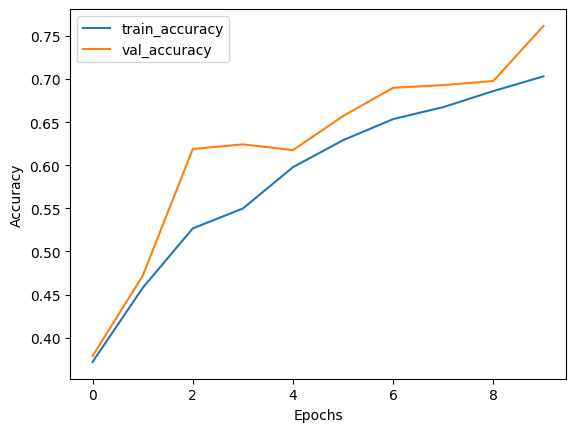

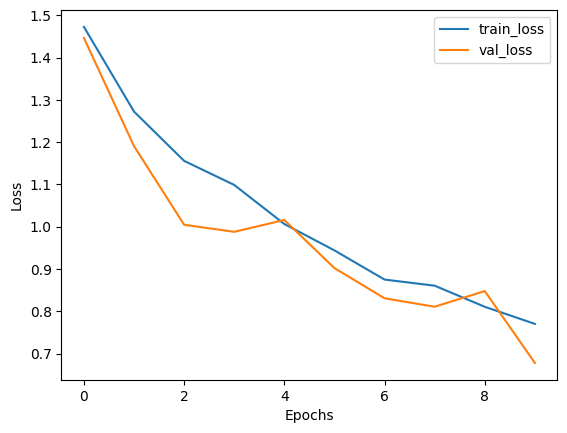

In [10]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()